In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   caffeine_deviation  100 non-null    float64
 1   productivity        100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [4]:
df.describe()

,caffeine_deviation,productivity
count,1.000000e+02,100.000000
mean,5.115908e-15,75.396200
std,1.758275e+02,22.059608
min,-3.000000e+02,26.430000
25%,-1.499975e+02,59.582500
50%,0.000000e+00,82.190000
75%,1.499975e+02,95.095000
max,3.000000e+02,101.870000


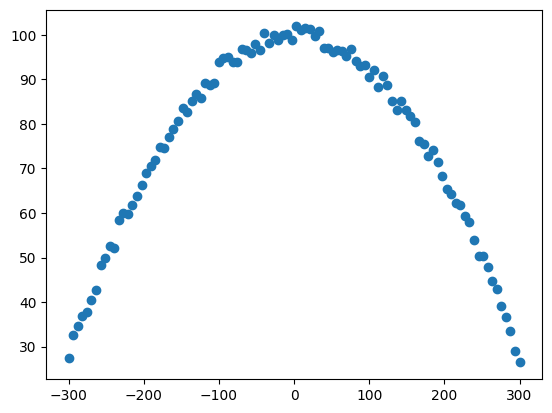

In [6]:
plt.scatter(df['caffeine_deviation'], df['productivity'])

In [8]:
x = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [9]:
x

,caffeine_deviation
0,-300.00
1,-293.94
2,-287.88
3,-281.82
4,-275.76
...,...
95,275.76
96,281.82
97,287.88
98,293.94


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [13]:
x_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred = model.predict(x_poly)
r2_score(y, y_pred)

0.9971219957028244

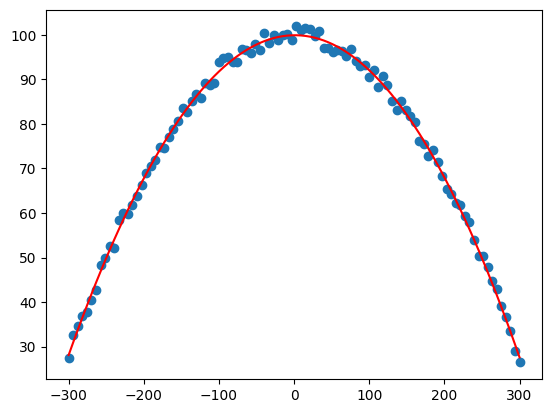

In [16]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

In [17]:
from joblib import dump
dump(model, 'model.joblib')

['model.joblib']